In [1]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [2]:
dataset_folder = '../../../datasets/'

#features_to_use = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
features_to_use = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]
feature_names = ['Race', 'Alcohol', 'Junky', 'Supervised Release',
                    'Married', 'Felony', 'WorkRelease',
                    'Crime against Property', 'Crime against Person',
                    'Gender', 'Priors', 'YearsSchool', 'PrisonViolations',
                    'Age', 'MonthsServed', '', 'Recidivism']
def violations_fn(x):
    x = x.astype(float)
    d = np.digitize(x, [0, 5, float('inf')],
                    right=True).astype('|S128')
    return utils.map_array_values(d, {'0': 'NO', '1': '1 to 5', '2': 'More than 5'})
def priors_fn(x):
    x = x.astype(float)
    d = np.digitize(x, [-1, 0, 5, float('inf')],
                    right=True).astype('|S128')
    return utils.map_array_values(d, {'0': 'UNKNOWN', '1': 'NO', '2': '1 to 5', '3': 'More than 5'})
transformations = {
    0: lambda x: utils.replace_binary_values(x, ['Black', 'White']),
    1: lambda x: utils.replace_binary_values(x, ['No', 'Yes']),
    2: lambda x: utils.replace_binary_values(x, ['No', 'Yes']),
    3: lambda x: utils.replace_binary_values(x, ['No', 'Yes']),
    4: lambda x: utils.replace_binary_values(x, ['No', 'Married']),
    5: lambda x: utils.replace_binary_values(x, ['No', 'Yes']),
    6: lambda x: utils.replace_binary_values(x, ['No', 'Yes']),
    7: lambda x: utils.replace_binary_values(x, ['No', 'Yes']),
    8: lambda x: utils.replace_binary_values(x, ['No', 'Yes']),
    9: lambda x: utils.replace_binary_values(x, ['Female', 'Male']),
    10: lambda x: priors_fn(x),
    12: lambda x: violations_fn(x),
    13: lambda x: (x.astype(float) / 12).astype(int),
    16: lambda x: utils.replace_binary_values(x, ['No more crimes',
                                            'Re-arrested'])
}

dataset = utils.load_csv_dataset(
    os.path.join(dataset_folder, 'recidivism/Data_1980.csv'), 16,
    feature_names=feature_names, discretize=True,
    features_to_use=features_to_use, balance=True,
    feature_transformations=transformations, skip_first=True)
#dataset = utils.load_dataset('recidivism', balance=True, dataset_folder=dataset_folder, discretize=True)
print(dataset.train[0])

[0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.]


In [3]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
import dataset_manager
import testbench
import utils

nb_rows = 100
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=nb_rows)
print(dm.space_size())
explainer = ae.ArgTabularExplainer(dm, 'rcdvsshort_' + str(nb_rows), compute=True, output_path='../../saves')
tb = testbench.Testbench(dm)

# tb.explore_full_dataset(16)
# tb.explore_neighborhoods(16)

Train 0.96
Test 0.548936170212766
8192
rcdvsshort_100
Generating arguments
len  1 : 0 ,  1
26 potential arg checked ( 0 not minimal)
len  2 : 17 ,  10
268 potential arg checked ( 15 not minimal)
len  3 : 66 ,  56
1291 potential arg checked ( 355 not minimal)
len  4 : 88 ,  60
3363 potential arg checked ( 2313 not minimal)
len  5 : 29 ,  46
5455 potential arg checked ( 6888 not minimal)
len  6 : 4 ,  11
5695 potential arg checked ( 11826 not minimal)
len  7 : 2 ,  4
3810 potential arg checked ( 12649 not minimal)
len  8 : 0 ,  0
1568 potential arg checked ( 8587 not minimal)
len  9 : 0 ,  0
365 potential arg checked ( 3598 not minimal)
len  10 : 0 ,  0
37 potential arg checked ( 853 not minimal)
len  11 : 0 ,  0
0 potential arg checked ( 88 not minimal)
Total number of arguments:  394
Saving to  ../../saves\rcdvsshort_100_minimals.df


In [4]:
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=None)
c = dm.get_classifier()

for nb_rows in utils.make_slices(dm.get_nb_rows(), 10):
    dm = dataset_manager.DatasetManager(dataset, classifier=c, nb_rows=nb_rows)
    explainer = ae.ArgTabularExplainer(dm, 'rcdvsshort_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
    G = explainer.build_attack_graph(compute=True, display_graph=False)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    print('nodes:', len(G.nodes()))
    print('edges:', len(G.edges()))

Train 0.7460514640638864
Test 0.6439716312056738
rcdvsshort_563
Total number of arguments:  1423
Saving to  ../../saves\rcdvsshort_563_minimals.df
edges per node: 124.58468025298664
nodes: 1423
edges: 88642
rcdvsshort_1126
Total number of arguments:  1838
Saving to  ../../saves\rcdvsshort_1126_minimals.df
edges per node: 112.65179542981501
nodes: 1838
edges: 103527
rcdvsshort_1689
Total number of arguments:  2188
Saving to  ../../saves\rcdvsshort_1689_minimals.df
edges per node: 121.90676416819012
nodes: 2188
edges: 133366
rcdvsshort_2252
Total number of arguments:  2411
Saving to  ../../saves\rcdvsshort_2252_minimals.df
edges per node: 129.6723351306512
nodes: 2411
edges: 156320
rcdvsshort_2815
Total number of arguments:  2636
Saving to  ../../saves\rcdvsshort_2815_minimals.df
edges per node: 130.12139605462824
nodes: 2636
edges: 171500
rcdvsshort_3378
Total number of arguments:  2801
Saving to  ../../saves\rcdvsshort_3378_minimals.df
edges per node: 128.7904319885755
nodes: 2801
edge

[103527, 133366, 156320, 171500, 180371, 187461, 189621, 183371, 177253, 88642]
(563, 1126, 1689, 2252, 2815, 3378, 3941, 4504, 5067, 5635) (1423, 1838, 2188, 2411, 2636, 2801, 2993, 3072, 3113, 3085)


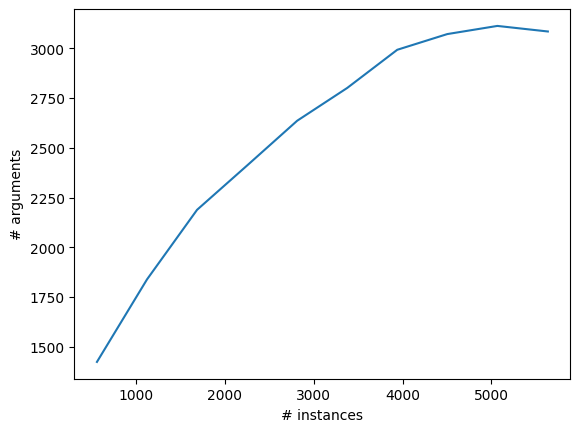

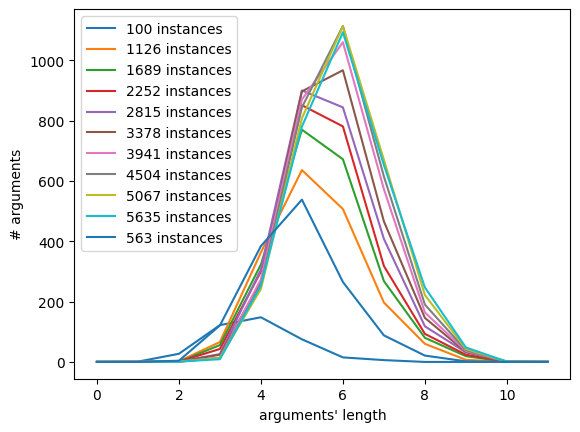

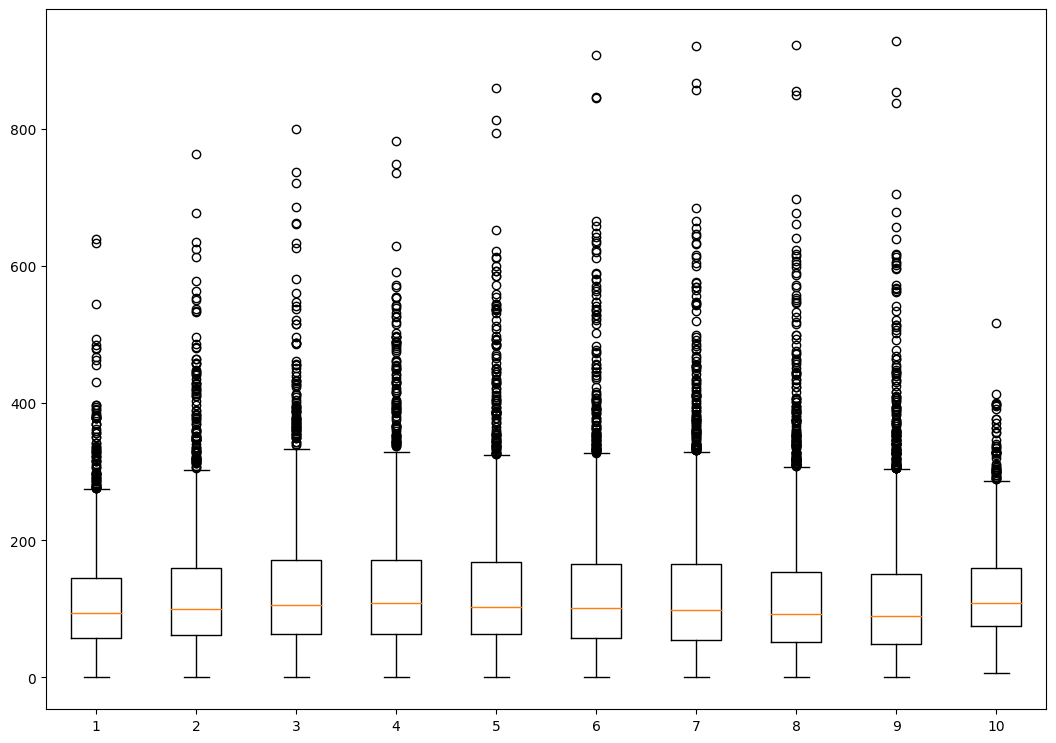

(5635, 5067, 4504, 3941, 3378, 2815, 2252, 1689, 1126, 563) (0.006807131280389012, 0.006103437198843542, 0.0048828125, 0.00467758102238558, 0.004284184219921494, 0.003793626707132014, 0.0037328909166320923, 0.0022851919561243106, 0.0010881392818280489, 0.0)


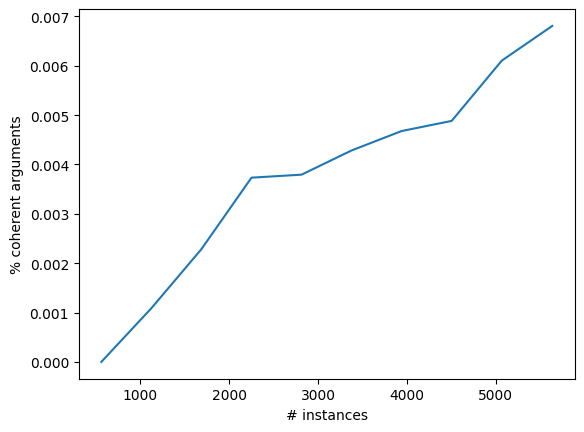

In [5]:
explainer.af_analysis()

In [26]:
G = explainer.build_attack_graph(compute=True, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explainer.export_graph('asp', '../../saves')
print(len(G.nodes()))

recidivismshort_50
edges per node: 54.79838709677419
248


In [6]:
from typing import OrderedDict
import networkx as nx
from sklearn import preprocessing
import random
from numba import njit

le = preprocessing.LabelEncoder()


def generate_full_dataset():
    instance = OrderedDict.fromkeys(explainer.dataset.columns)
    full_dataset = []

    def gen_rec(instance, columns, col_index, full_dataset):
        inst_ = instance.copy()
        if col_index == len(columns) - 1:
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                full_dataset.append(list(inst_.values()))
        else:
            inst_ = instance.copy()
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                gen_rec(inst_, columns, col_index + 1, full_dataset)

    gen_rec(instance, list(instance.keys()), 0, full_dataset)
    return full_dataset

def instance2encoded(instance, dataset):
    encoded = []
    for col in dataset.categorical_features:
        encoded.append(dataset.categorical_names[col].index(instance[col]))
    return np.array(encoded)

def explore_full_dataset(nb_steps):
    full_dataset = generate_full_dataset()
    y_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in full_dataset]
    #train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
    
    random.seed(1)
    indices = list(range(len(full_dataset)))
    random.shuffle(indices)
    full_dataset_shuff = [full_dataset[i] for i in indices] 
    y_plus_shuff = [y_plus[i] for i in indices]

    print(np.unique(np.array(y_plus_shuff)))
    
    step_len = len(full_dataset)//nb_steps
    steps = [i*step_len for i in range(15, nb_steps)]
    steps.append(len(full_dataset))
    for nb_vals in steps:
        dataset_t = full_dataset_shuff[:nb_vals]
        y_t = y_plus_shuff[:nb_vals]
        print('total length', len(dataset_t), len(y_t))
        train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)

        explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'rcdvshort_' + str(nb_vals) + '_synth', compute=True, output_path='../../saves')

        G = explainer.build_attack_graph(compute=True, display_graph=False)
        print('total args:', len(G.nodes()))
        print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explore_full_dataset(16)

[0 1]
total length 23040 23040
Generating arguments
len  1 : 0 ,  0
29 potential arg checked ( 0 not minimal)
len  2 : 0 ,  0
382 potential arg checked ( 0 not minimal)
len  3 : 0 ,  0
3024 potential arg checked ( 0 not minimal)
len  4 : 0 ,  0
16032 potential arg checked ( 0 not minimal)
len  5 : 5 ,  1
60000 potential arg checked ( 0 not minimal)
len  6 : 348 ,  126
162539 potential arg checked ( 85 not minimal)
len  7 : 1202 ,  856
316908 potential arg checked ( 4884 not minimal)
len  8 : 2280 ,  2231
430661 potential arg checked ( 30907 not minimal)
len  9 : 2834 ,  2785
379633 potential arg checked ( 88591 not minimal)
len  10 : 1245 ,  1332
187621 potential arg checked ( 131353 not minimal)
len  11 : 208 ,  260
37381 potential arg checked ( 93270 not minimal)
len  12 : 0 ,  2
2 potential arg checked ( 23038 not minimal)
Saving to  ../../saves\rcdvshort_23040_synth_minimals.df
rcdvshort_23040_synth
total args: 15715
edges per node: 2.5225580655424755
total length 24576 24576
Gener

In [ ]:
explainer.af_analysis()

['recidivism_1000_atk_graph.df', 'recidivism_100_atk_graph.df', 'recidivism_200_atk_graph.df', 'recidivism_500_atk_graph.df', 'recidivism_50_atk_graph.df'] ['recidivism_1000_R_atk.df', 'recidivism_100_R_atk.df', 'recidivism_200_R_atk.df', 'recidivism_500_R_atk.df', 'recidivism_50_R_atk.df']
[117395305, 1745735, 8820614, 50879238, 302275]


In [28]:
#ext_gen = explainer.extension_generator_from_graph()
ext_gen = explainer.extension_generator_from_sat(file='../../saves/recidivismshort_50_sat.txt')
#max_covi_ext = explainer.make_selection('max_covi_incl', ext_gen)
max_covi_ext = explainer.make_selection('max_covi', ext_gen)
res = explainer.apply_inference(max_covi_ext, 'universal')
#print(res)

explainer.display_explanations(verbose=True)

Using pre-processed file...
Reading ../../saves/recidivismshort_50_sat_preprocessed.txt
Time for selection:  1404.9758040904999
Len max_cov_exts:  1
id: 0 coverage: 8 Arg 1/4: frozenset({'Felony_0', 'Race_0', 'Crime against Property_1'})
id: 1 coverage: 16 Arg 1/3: frozenset({'Married_0', 'Race_0', 'Priors_2'})
id: 2 coverage: 10 Arg 1/1: frozenset({'Race_1', 'Married_1'})
id: 3 coverage: 3 Arg 1/1: frozenset({'Race_0', 'YearsSchool_10.00 < YearsSchool <= 11.00'})
id: 4 coverage: 1 Arg 1/1: frozenset({'Felony_0', 'Crime against Property_1', 'Race_1', 'Priors_1'})
id: 5 coverage: 0 Arg 1/0: None
id: 6 coverage: 4 Arg 1/1: frozenset({'Crime against Property_0', 'YearsSchool_YearsSchool > 11.00', 'Priors_1'})
id: 7 coverage: 7 Arg 1/3: frozenset({'Felony_0', 'Race_0', 'Priors_2'})
id: 8 coverage: 10 Arg 1/1: frozenset({'Race_1', 'Married_1'})
id: 9 coverage: 1 Arg 1/1: frozenset({'Priors_2', 'Alcohol_0', 'Race_1', 'WorkRelease_0'})
id: 10 coverage: 5 Arg 1/1: frozenset({'YearsSchool_8.00 